In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


# Dataset Name: Online Shoppers Purchasing Intention Dataset Data Set

Data Set Information: The dataset consists of feature vectors belonging to 12,330 sessions.

The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

Attribute Information:

•	The dataset consists of 10 numerical and 8 categorical attributes.

•	The 'Revenue' attribute can be used as the class label.

•	"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

•	 The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

•	 The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 

•	The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

•	The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. 

•	The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 

•	For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.


# Data Ingestion

In [202]:
data=pd.read_csv("C:\\Users\\Asus\\Desktop\\USL-SET-2\\online_shoppers_intention.csv")

In [203]:
data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


# Describtive analyis

In [204]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157213,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [205]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [206]:
data.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


In [207]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [208]:
data.shape

(12330, 18)

## The dataset comprises of 12330 rows with 18 columns , also there are currently no null values in our dataset

# K-Means Clustering

In [209]:
df=data.drop(["Revenue"],axis=1)

In [210]:
df["Weekend"]=df["Weekend"].astype("category")

In [211]:
df=pd.get_dummies(df,drop_first=True)

In [212]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df[["ProductRelated_Duration","BounceRates","ExitRates","PageValues","SpecialDay"]]=pd.DataFrame(sc.fit_transform(df[["ProductRelated_Duration","BounceRates","ExitRates","PageValues","SpecialDay"]]))

In [213]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,0,0.0,0,0.0,1,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,1,0
1,0,0.0,0,0.0,2,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,1,0
2,0,0.0,0,0.0,1,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,1,0
3,0,0.0,0,0.0,2,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,1,0
4,0,0.0,0,0.0,10,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,1,1


In [214]:
plt.rcParams['figure.figsize'] = (16, 9)

plt.style.use('ggplot')

from sklearn import metrics

In [215]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 10)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df)
  labels = clusters.labels_                    
  centroids = clusters.cluster_centers_ 
  cluster_errors.append( clusters.inertia_ )
  


# Dataframe of cluster_range and cluster_errors
clus_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clus_df[0:15]




,num_clusters,cluster_errors
0,1,6.544699e+08
1,2,4.077420e+08
2,3,2.788418e+08
3,4,1.961007e+08
4,5,1.614485e+08
5,6,1.293240e+08
6,7,1.110300e+08
7,8,9.725677e+07
8,9,8.462222e+07


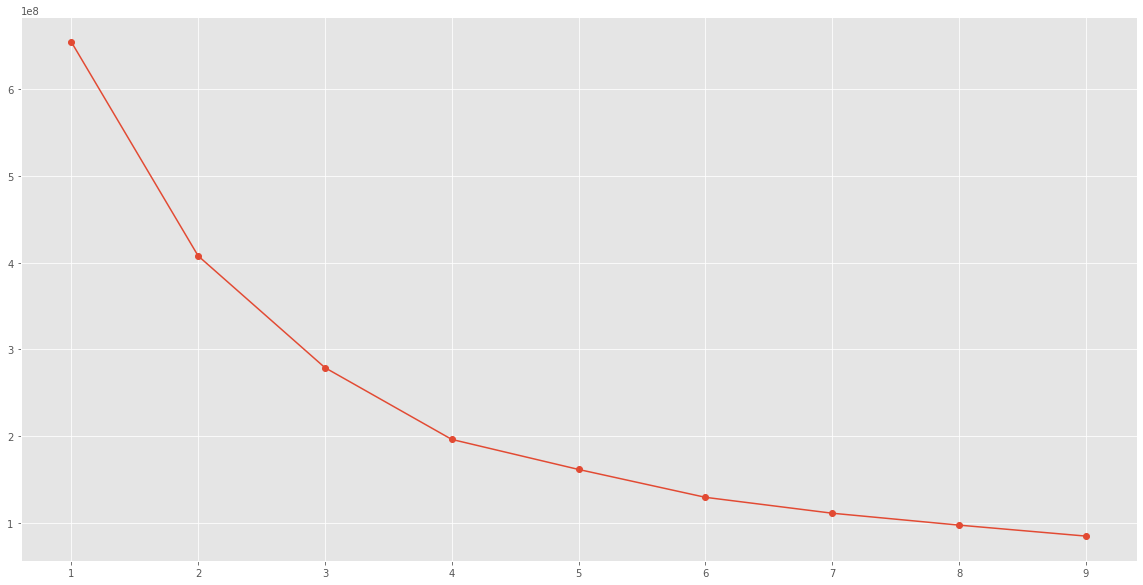

In [216]:
# Elbow plot

plt.figure(figsize=(20,10))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

## The no. of clusters inferred from this elbow plot seems to be 4, but there is also highly possibility of no. of clusters = 3

# Agglomerative Clustering

In [219]:
from sklearn.cluster import AgglomerativeClustering 

## Dendogram

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 30))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

### Cutting the dendogram at 17500 for better analysis

In [ ]:
plt.figure(figsize=(7, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))
plt.axhline(y=17500, color='r', linestyle='--')

##  Dendogram is giving us 3 main clusters that are clearly visible , also through  KMEANS were already confused between 4 and 3 , so from both analysis we gonna be taking no. of clusters = 3

# Converting Unsupervised problem into Supervised problem

## KMeans

In [220]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,0,0.0,0,0.0,1,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,1,0
1,0,0.0,0,0.0,2,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,1,0
2,0,0.0,0,0.0,1,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,1,0
3,0,0.0,0,0.0,2,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,1,0
4,0,0.0,0,0.0,10,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,1,1


In [221]:
batman= KMeans(n_clusters = 3,init = 'k-means++',max_iter = 750,n_init =2)
              
batman.fit(df)
print(batman.labels_,(batman.inertia_))
    
df["labels"]=batman.labels_

[0 0 0 ... 0 0 0] 278841776.6858006


In [222]:
# grouping data based on data
group1=df[df.labels==0]
group2=df[df.labels==1]
group3=df[df.labels==2]


In [223]:
df.head(100)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,labels
0,0,0.000000,0,0.0,1,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0,0,0,0,0,0,0,1,0,0
1,0,0.000000,0,0.0,2,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,0,0,0,0,0,0,0,1,0,0
2,0,0.000000,0,0.0,1,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0,0,0,0,0,0,0,1,0,0
3,0,0.000000,0,0.0,2,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,0,0,0,0,0,0,0,1,0,0
4,0,0.000000,0,0.0,10,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,0,0,0,0,0,0,0,1,1,0
5,0,0.000000,0,0.0,19,-0.543757,-0.132035,-0.380935,-0.317178,-0.308821,...,0,0,0,0,0,0,0,1,0,0
6,0,0.000000,0,0.0,1,-0.624348,3.667189,3.229316,-0.317178,1.702146,...,0,0,0,0,0,0,0,1,0,0
7,1,0.000000,0,0.0,0,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0,0,0,0,0,0,0,1,1,0
8,0,0.000000,0,0.0,2,-0.605012,-0.457683,1.171473,-0.317178,3.713114,...,0,0,0,0,0,0,0,1,0,0
9,0,0.000000,0,0.0,3,-0.238685,-0.457683,-0.429072,-0.317178,1.702146,...,0,0,0,0,0,0,0,1,0,0


In [224]:
df.labels.value_counts()

0    11595
1      468
2      267
Name: labels, dtype: int64

## Applying PCA

In [225]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


## We gonna be using n_components = 5 for our PCA

In [226]:
x = df.drop("labels",axis=1)
y =df.labels

df_pca= PCA(n_components=5).fit_transform(x)


### Plotting first 3 components

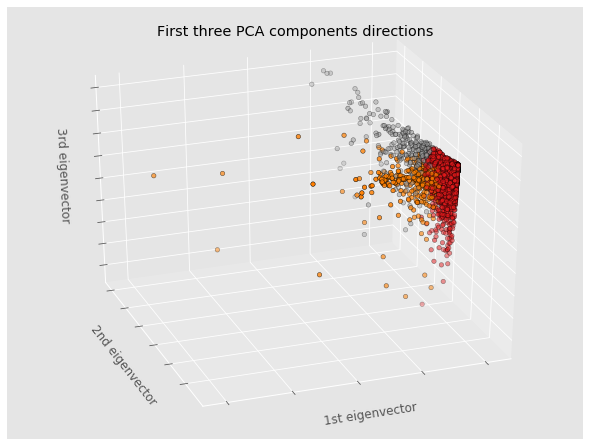

In [227]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(df_pca[:, 0],df_pca[:, 1],df_pca[:, 2], c=y,cmap=plt.cm.Set1, edgecolor='k')
ax.set_title("First three PCA components directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [228]:
df_pca_dt=pd.DataFrame(df_pca)

In [229]:
df_pca_dt["label"]=y

In [230]:
df_pca_dt.head()

,0,1,2,3,4,label
0,-90.219082,-0.881253,-23.042583,-3.279213,1.785094,0
1,-90.127348,-0.836166,-22.022917,-2.291094,1.306779,0
2,-90.221572,-0.885953,-23.064187,-0.793286,0.479863,0
3,-90.130393,-0.837714,-22.040974,-0.174135,1.259718,0
4,-89.435033,-0.470418,-14.062239,-0.171176,1.369256,0


# Modeling

In [231]:
from sklearn.model_selection import train_test_split

In [232]:
scaled_xtrain,scaled_xtest,ytrain,ytest=train_test_split(df_pca,y,test_size=0.30,random_state=12)

In [233]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [234]:
y_lr=lr.fit(scaled_xtrain,ytrain).predict(scaled_xtest)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [235]:
from sklearn.metrics import classification_report,confusion_matrix,explained_variance_score,cohen_kappa_score,accuracy_score,f1_score

In [236]:
classificationreport = classification_report(ytest,y_lr)
print(classificationreport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3463
           1       0.98      0.96      0.97       154
           2       1.00      0.95      0.97        82

   micro avg       1.00      1.00      1.00      3699
   macro avg       0.99      0.97      0.98      3699
weighted avg       1.00      1.00      1.00      3699



In [237]:
accuracy_score(ytest,y_lr)

0.9967558799675588

In [238]:
cohen_kappa_score(ytest,y_lr)

0.972873624751809

In [239]:
explained_variance_score(ytest,y_lr)

0.9538837693558189

In [240]:
# Decision Tree

In [241]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [242]:
y_dt=dt.fit(scaled_xtrain,ytrain).predict(scaled_xtest)

In [243]:
from sklearn.metrics import classification_report,confusion_matrix,explained_variance_score,cohen_kappa_score,accuracy_score

In [244]:
classificationreport = classification_report(ytest,y_dt)
print(classificationreport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3463
           1       0.99      0.99      0.99       154
           2       0.97      0.93      0.95        82

   micro avg       1.00      1.00      1.00      3699
   macro avg       0.99      0.97      0.98      3699
weighted avg       1.00      1.00      1.00      3699



In [245]:
accuracy_score(ytest,y_dt)

0.9975669099756691

In [246]:
cohen_kappa_score(ytest,y_dt)

0.9797778976448549

In [247]:
explained_variance_score(ytest,y_dt)

0.9472515658873798

In [248]:
# KNN

In [249]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [250]:
y_kn=knn.fit(scaled_xtrain,ytrain).predict(scaled_xtest)

In [251]:
from sklearn.metrics import classification_report,confusion_matrix,explained_variance_score,cohen_kappa_score,accuracy_score

In [252]:
classificationreport = classification_report(ytest,y_kn)
print(classificationreport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3463
           1       0.99      0.98      0.98       154
           2       0.99      1.00      0.99        82

   micro avg       1.00      1.00      1.00      3699
   macro avg       0.99      0.99      0.99      3699
weighted avg       1.00      1.00      1.00      3699



In [253]:
accuracy_score(ytest,y_kn)

0.9983779399837794

In [254]:
cohen_kappa_score(ytest,y_kn)

0.9866290250285565

In [255]:
explained_variance_score(ytest,y_kn)

0.9802056613354548

In [256]:
# Naive Bayes

In [257]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()


In [258]:
y_nb=nb.fit(scaled_xtrain,ytrain).predict(scaled_xtest)

In [259]:
from sklearn.metrics import classification_report,confusion_matrix,explained_variance_score,cohen_kappa_score,accuracy_score,f1_score

In [260]:
classificationreport = classification_report(ytest,y_nb)
print(classificationreport)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3463
           1       0.61      0.97      0.75       154
           2       0.58      0.98      0.72        82

   micro avg       0.96      0.96      0.96      3699
   macro avg       0.73      0.97      0.82      3699
weighted avg       0.97      0.96      0.96      3699



In [261]:
accuracy_score(ytest,y_nb)

0.9583671262503379

In [262]:
cohen_kappa_score(ytest,y_nb)

0.7354947093927084

In [263]:
explained_variance_score(ytest,y_nb)

0.3233677846394979

# Ensemble Techniques

In [264]:
# Random Forest

In [265]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [266]:
y_rf=rf.fit(scaled_xtrain,ytrain).predict(scaled_xtest)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [267]:
from sklearn.metrics import classification_report,confusion_matrix,explained_variance_score,cohen_kappa_score,accuracy_score

In [268]:
classificationreport = classification_report(ytest,y_rf)
print(classificationreport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3463
           1       0.97      1.00      0.98       154
           2       0.99      0.93      0.96        82

   micro avg       1.00      1.00      1.00      3699
   macro avg       0.98      0.98      0.98      3699
weighted avg       1.00      1.00      1.00      3699



In [269]:
accuracy_score(ytest,y_rf)

0.9975669099756691

In [270]:
cohen_kappa_score(ytest,y_rf)

0.9799383162431483

In [271]:
explained_variance_score(ytest,y_rf)

0.9538266874539926

In [272]:
# XGBoost

In [273]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [274]:
y_xgb=xgb.fit(scaled_xtrain,ytrain).predict(scaled_xtest)

In [275]:
from sklearn.metrics import classification_report,confusion_matrix,explained_variance_score,cohen_kappa_score,accuracy_score,f1_score

In [276]:
classificationreport = classification_report(ytest,y_xgb)
print(classificationreport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3463
           1       0.99      0.99      0.99       154
           2       0.96      0.98      0.97        82

   micro avg       1.00      1.00      1.00      3699
   macro avg       0.98      0.99      0.99      3699
weighted avg       1.00      1.00      1.00      3699



In [277]:
accuracy_score(ytest,y_xgb)

0.9981075966477426

In [278]:
cohen_kappa_score(ytest,y_xgb)

0.984431565447491

In [279]:
explained_variance_score(ytest,y_xgb)

0.9648113859366843

# Without PCA

In [280]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,labels
0,0,0.0,0,0.0,1,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0,0,0,0,0,0,0,1,0,0
1,0,0.0,0,0.0,2,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,0,0,0,0,0,0,0,1,0,0
2,0,0.0,0,0.0,1,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0,0,0,0,0,0,0,1,0,0
3,0,0.0,0,0.0,2,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,0,0,0,0,0,0,0,1,0,0
4,0,0.0,0,0.0,10,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,0,0,0,0,0,0,0,1,1,0


In [282]:
xx=df.drop("labels",axis=1)
y=df.labels

In [283]:
from sklearn.model_selection import train_test_split

In [284]:
scaled_xtrain,scaled_xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=12)

In [ ]:
# Logistic

In [285]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [286]:
y_lr=lr.fit(scaled_xtrain,ytrain).predict(scaled_xtest)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [287]:
from sklearn.metrics import classification_report,confusion_matrix,explained_variance_score,cohen_kappa_score,accuracy_score,f1_score

In [288]:
classificationreport = classification_report(ytest,y_lr)
print(classificationreport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3463
           1       0.96      0.96      0.96       154
           2       0.96      0.89      0.92        82

   micro avg       0.99      0.99      0.99      3699
   macro avg       0.97      0.95      0.96      3699
weighted avg       0.99      0.99      0.99      3699



In [289]:
accuracy_score(ytest,y_lr)

0.9940524466071912

In [290]:
cohen_kappa_score(ytest,y_lr)

0.9503643170564792

In [291]:
explained_variance_score(ytest,y_lr)

0.885714897306091

In [292]:
# Decision Tree

In [293]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [294]:
y_dt=dt.fit(scaled_xtrain,ytrain).predict(scaled_xtest)

In [295]:
from sklearn.metrics import classification_report,confusion_matrix,explained_variance_score,cohen_kappa_score,accuracy_score

In [296]:
classificationreport = classification_report(ytest,y_dt)
print(classificationreport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3463
           1       0.99      0.98      0.98       154
           2       0.97      0.95      0.96        82

   micro avg       1.00      1.00      1.00      3699
   macro avg       0.99      0.98      0.98      3699
weighted avg       1.00      1.00      1.00      3699



In [297]:
accuracy_score(ytest,y_dt)

0.9975669099756691

In [298]:
cohen_kappa_score(ytest,y_dt)

0.9798202241469921

In [299]:
explained_variance_score(ytest,y_dt)

0.9538266874539926

In [300]:
# KNN

In [301]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [302]:
y_kn=knn.fit(scaled_xtrain,ytrain).predict(scaled_xtest)

In [303]:
from sklearn.metrics import classification_report,confusion_matrix,explained_variance_score,cohen_kappa_score,accuracy_score

In [304]:
classificationreport = classification_report(ytest,y_kn)
print(classificationreport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3463
           1       0.99      0.97      0.98       154
           2       0.99      1.00      0.99        82

   micro avg       1.00      1.00      1.00      3699
   macro avg       0.99      0.99      0.99      3699
weighted avg       1.00      1.00      1.00      3699



In [305]:
accuracy_score(ytest,y_kn)

0.9978372533117059

In [306]:
cohen_kappa_score(ytest,y_kn)

0.9821006674142868

In [307]:
explained_variance_score(ytest,y_kn)

0.9758067872759684

In [308]:
# Naive Bayes

In [309]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()


In [310]:
y_nb=nb.fit(scaled_xtrain,ytrain).predict(scaled_xtest)

In [311]:
from sklearn.metrics import classification_report,confusion_matrix,explained_variance_score,cohen_kappa_score,accuracy_score,f1_score

In [312]:
classificationreport = classification_report(ytest,y_nb)
print(classificationreport)

              precision    recall  f1-score   support

           0       1.00      0.68      0.81      3463
           1       0.84      0.44      0.57       154
           2       0.06      0.98      0.12        82

   micro avg       0.68      0.68      0.68      3699
   macro avg       0.63      0.70      0.50      3699
weighted avg       0.97      0.68      0.78      3699



In [313]:
accuracy_score(ytest,y_nb)

0.6769397134360639

In [314]:
cohen_kappa_score(ytest,y_nb)

0.1805696057161894

In [315]:
explained_variance_score(ytest,y_nb)

-5.76249290935751

# Ensemble Techniques

In [316]:
# Random Forest

In [317]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [318]:
y_rf=rf.fit(scaled_xtrain,ytrain).predict(scaled_xtest)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [319]:
from sklearn.metrics import classification_report,confusion_matrix,explained_variance_score,cohen_kappa_score,accuracy_score

In [320]:
classificationreport = classification_report(ytest,y_rf)
print(classificationreport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3463
           1       0.97      0.97      0.97       154
           2       0.95      0.91      0.93        82

   micro avg       1.00      1.00      1.00      3699
   macro avg       0.97      0.96      0.97      3699
weighted avg       1.00      1.00      1.00      3699



In [321]:
accuracy_score(ytest,y_rf)

0.9959448499594485

In [322]:
cohen_kappa_score(ytest,y_rf)

0.9663655723126556

In [323]:
explained_variance_score(ytest,y_rf)

0.9208416726424282

In [324]:
# XGBoost

In [325]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [326]:
y_xgb=xgb.fit(scaled_xtrain,ytrain).predict(scaled_xtest)

In [327]:
from sklearn.metrics import classification_report,confusion_matrix,explained_variance_score,cohen_kappa_score,accuracy_score,f1_score

In [328]:
classificationreport = classification_report(ytest,y_xgb)
print(classificationreport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3463
           1       0.99      0.99      0.99       154
           2       0.94      0.95      0.95        82

   micro avg       1.00      1.00      1.00      3699
   macro avg       0.98      0.98      0.98      3699
weighted avg       1.00      1.00      1.00      3699



In [329]:
accuracy_score(ytest,y_xgb)

0.9970262233035956

In [330]:
cohen_kappa_score(ytest,y_xgb)

0.9755353171317717

In [331]:
explained_variance_score(ytest,y_xgb)

0.9296203934607925

# Tabulating the Observations

In [332]:
dict={"Without PCA Cohen Kappa Score":[0.9503643170564792,0.9798202241469921,0.9821006674142868,0.1805696057161894,0.9663655723126556,0.9755353171317717
],"With PCA Cohen Kappa Score":[0.972873624751809,0.9797778976448549,0.9866290250285565,0.7354947093927084,0.9799383162431483,0.984431565447491]}

In [335]:
pd.DataFrame(dict,index=["Logistic Regression","Decision Tree","K-Nearest Neighbours","Naive-Bayes","Random Forest","XGBoost"])

,Without PCA Cohen Kappa Score,With PCA Cohen Kappa Score
Logistic Regression,0.950364,0.972874
Decision Tree,0.979820,0.979778
K-Nearest Neighbours,0.982101,0.986629
Naive-Bayes,0.180570,0.735495
Random Forest,0.966366,0.979938
XGBoost,0.975535,0.984432


# Conclusion :

## With the help of Clustering and PCA we were able to increase our Cohen Kappa Score , the highest increment noticed is in Naive Bayes where the increment is from 18 % to 73 %

## I would like to suggest to with Random Forest , as its score is around between highest and lowest observed 